In [1]:
import keras
from keras.models import Model
from keras.layers import *
from keras.optimizers import *

Using TensorFlow backend.


In [16]:
import h5py
with h5py.File('dataset.h5','r') as hf:
    X = hf['X'][:]
    y = hf['y'][:]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train.reshape(-1,256,256,1)
X_test = X_test.reshape(-1,256,256,1)

In [27]:
inputs = Input((256, 256,1))
Conv = Conv2D(1, kernel_size=(3,3), strides=(5, 5), padding='same', activation='linear')(inputs)
Conv = Conv2D(1, kernel_size=(3,3), strides=(5, 5), padding='same', activation='linear')(Conv)
flat = Flatten()(Conv)
dense = Dense(2,activation = 'tanh')(flat)
dense = Dense(1, activation = 'sigmoid')(dense)

model = Model(inputs, dense)
model.compile(loss='mean_squared_error',optimizer=SGD(lr=2.0), metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 1)         10        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 1)         10        
_________________________________________________________________
flatten_7 (Flatten)          (None, 121)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 244       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 3         
Total params: 267
Trainable params: 267
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 134 samples, validate on 66 samples
Epoch 1/30
134/134 [==============================] - 0s 547us/step - loss: 0.1665 - acc: 0.7388 - val_loss: 0.3902 - val_acc: 0.5000
Epoch 2/30
134/134 [==============================] - 0s 558us/step - loss: 0.3382 - acc: 0.5373 - val_loss: 0.2518 - val_acc: 0.6061
Epoch 3/30
134/134 [==============================] - 0s 565us/step - loss: 0.1610 - acc: 0.7313 - val_loss: 0.2409 - val_acc: 0.5606
Epoch 4/30
134/134 [==============================] - 0s 597us/step - loss: 0.1413 - acc: 0.8060 - val_loss: 0.2659 - val_acc: 0.6061
Epoch 5/30
134/134 [==============================] - 0s 596us/step - loss: 0.1347 - acc: 0.8209 - val_loss: 0.2360 - val_acc: 0.5455
Epoch 6/30
134/134 [==============================] - 0s 567us/step - loss: 0.1265 - acc: 0.8507 - val_loss: 0.2368 - val_acc: 0.6212
Epoch 7/30
134/134 [==============================] - 0s 599us/step - loss: 0.1271 - acc: 0.8284 - val_loss: 0.2990 - val_acc: 0.5455
Epoch 8/30
134/13

In [35]:
inputs = Input((256,256,1))
Conv = Conv2D(16, (3,3), activation='relu',padding='same')(inputs)
Pool = MaxPooling2D((2,2))(Conv)

Conv = Conv2D(32, (3,3), activation='relu',padding='same')(Pool)
Pool = MaxPooling2D((2,2))(Conv)

Conv = Conv2D(32, (3,3), activation='relu',padding='same')(Pool)
Pool = MaxPooling2D((2,2))(Conv)

Conv = Conv2D(32, (3,3), activation='relu',padding='same')(Pool)
Pool = MaxPooling2D((2,2))(Conv)
Pool = Dropout(0.4)(Pool)

Conv = Conv2D(32, (3,3), activation='relu',padding='same')(Pool)
Pool = MaxPooling2D((2,2))(Conv)
Pool = Dropout(0.6)(Pool)

flat = Flatten()(Pool)

dense = Dense(32, activation='relu')(flat)
dense = Dropout(0.4)(dense)
dense1 = Dense(1, activation = 'sigmoid')(dense)

model = Model(inputs, dense1)
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001, decay=0.001), metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 256, 256, 16)      160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
__________

In [36]:
history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 134 samples, validate on 66 samples
Epoch 1/100
134/134 [==============================] - 2s 13ms/step - loss: 0.6999 - acc: 0.4925 - val_loss: 0.6928 - val_acc: 0.4697
Epoch 2/100
134/134 [==============================] - 1s 5ms/step - loss: 0.6882 - acc: 0.5075 - val_loss: 0.6927 - val_acc: 0.4697
Epoch 3/100
134/134 [==============================] - 1s 5ms/step - loss: 0.6940 - acc: 0.5075 - val_loss: 0.6924 - val_acc: 0.4697
Epoch 4/100
134/134 [==============================] - 1s 5ms/step - loss: 0.6878 - acc: 0.5224 - val_loss: 0.6944 - val_acc: 0.4697
Epoch 5/100
134/134 [==============================] - 1s 5ms/step - loss: 0.6891 - acc: 0.5373 - val_loss: 0.6932 - val_acc: 0.4697
Epoch 6/100
134/134 [==============================] - 1s 5ms/step - loss: 0.6979 - acc: 0.5149 - val_loss: 0.6903 - val_acc: 0.4697
Epoch 7/100
134/134 [==============================] - 1s 5ms/step - loss: 0.6829 - acc: 0.5224 - val_loss: 0.6889 - val_acc: 0.4697
Epoch 8/100
134/134 [==

Epoch 62/100
134/134 [==============================] - 1s 5ms/step - loss: 0.2775 - acc: 0.8881 - val_loss: 0.3015 - val_acc: 0.8939
Epoch 63/100
134/134 [==============================] - 1s 5ms/step - loss: 0.1782 - acc: 0.9254 - val_loss: 0.2659 - val_acc: 0.9091
Epoch 64/100
134/134 [==============================] - 1s 5ms/step - loss: 0.1910 - acc: 0.9179 - val_loss: 0.2365 - val_acc: 0.9394
Epoch 65/100
134/134 [==============================] - 1s 5ms/step - loss: 0.1921 - acc: 0.9254 - val_loss: 0.2349 - val_acc: 0.8939
Epoch 66/100
134/134 [==============================] - 1s 5ms/step - loss: 0.1567 - acc: 0.9403 - val_loss: 0.2967 - val_acc: 0.9091
Epoch 67/100
134/134 [==============================] - 1s 5ms/step - loss: 0.1864 - acc: 0.9254 - val_loss: 0.2705 - val_acc: 0.9545
Epoch 68/100
134/134 [==============================] - 1s 5ms/step - loss: 0.1656 - acc: 0.9179 - val_loss: 0.2808 - val_acc: 0.9242
Epoch 69/100
134/134 [==============================] - 1s 5ms

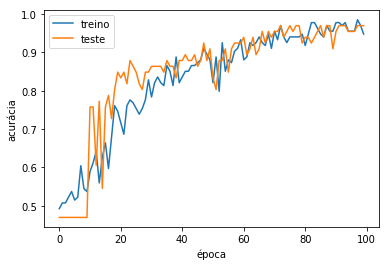

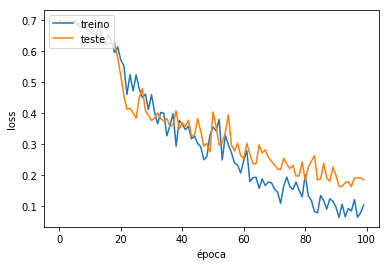

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()